In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Set the current working directory
import os
os.chdir('/content/drive/MyDrive/ml-verifier-oracle/training')
print("Current path: " + os.getcwd())

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import matplotlib.pyplot as plt
from random import random
import pandas as pd
import os

# A tree is a position and a radius
def generate_forest(n_trees):
    return [((random(), random()), random()*0.1) for _ in range(n_trees)]

def grow_forest(forest):
    return [(x[0], x[1]*(0.6+random())) for x in forest]

def cut_forest(forest, cut_prob=0.4):
    return [x for x in forest if random() > cut_prob]

# Draw and save image
def draw_forest(forest, filename, size=(2.24, 2.24)):
    circles = [plt.Circle(t[0], t[1], color="green") for t in forest]
    fig, ax = plt.subplots(figsize=size)  # Set the figure size using the size argument
    for c in circles:
        ax.add_patch(c)
        ax.set_xticks([])
        ax.set_yticks([])

    # Modify the filename to save in the correct dataset folder
    dataset_filename = os.path.join('dataset1k224x224', os.path.basename(filename))

    fig.savefig(dataset_filename)
    plt.close(fig)

def draw_forest2(forest, filename, size=(2.24, 2.24)):
    fig, ax = plt.subplots(figsize=size)

    for tree in forest:
        position, radius = tree
        color = "green" if random() > 0.6 else "lightgrey"  
        circle = plt.Circle(position, radius, color=color)
        ax.add_patch(circle)

    ax.set_xticks([])
    ax.set_yticks([])
    fig.savefig(filename)
    plt.close(fig)


def createDataset(output_filename, num_samples):
    data = []

    for i in range(num_samples):

        image_filenameT0 = f"forestT0_{i}.jpeg"
        image_filenameT1 = f"forestT1_{i}.jpeg"

        forest = generate_forest(25)
        draw_forest(forest, image_filenameT0)

        if i < num_samples // 2:
            # Label 0: Cut the forest at T1
            forest = cut_forest(forest)
            draw_forest(forest, image_filenameT1)

        else:
            # Label 1: Grow the forest at T1
            #forest = generate_forest(20)
            forest = grow_forest(forest)
            draw_forest(forest, image_filenameT1)

        # Append data to the list
        data.append({
            'imageT0': image_filenameT0,
            'imageT1': image_filenameT1,
            'label': 0 if i < num_samples // 2 else 1
        })

    # Convert the list to a Pandas DataFrame and save to CSV
    df = pd.DataFrame(data)
    df.to_csv(output_filename, index=False)


In [3]:
# Create dataset with 2xnum_saples total samples (for FALSE and TRUE labels)
createDataset('dataset1k224x224/forest_dataset.csv', num_samples=10)

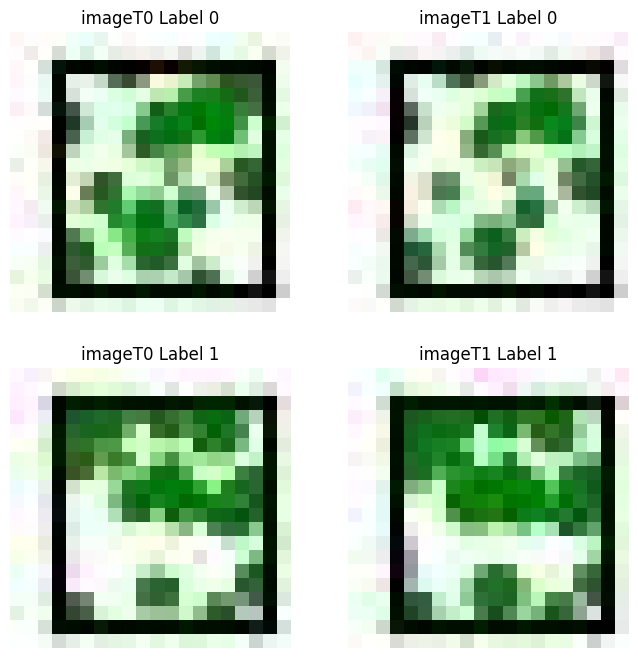

In [ ]:
# plot the synthetised forests over time

def plot_subplots(df):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
    for i in range(2):
        label_df = df[df['label'] == i].iloc[0]
        imageT0 = plt.imread(label_df['imageT0'])
        axes[i, 0].imshow(imageT0)
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f'imageT0 Label {i}')
        imageT1 = plt.imread(label_df['imageT1'])
        axes[i, 1].imshow(imageT1)
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f'imageT1 Label {i}')
    plt.show()

df = pd.read_csv('dataset/forest_dataset.csv')
plot_subplots(df)